# Super ResLight
Para problemas de **Restauração/Melhoramento/Geração de Imagens**: Modelos de Super Resolução e Aprimoramento de Baixa Luminosidade

**Integrantes:** Rafael Fernandes


## Super Resolution e Low Light Enhancement
Problemas de resolução:

<div style="display: flex; justify-content: center; align-items: center; gap: 10px;">

  <figure style="width: 26.5%; margin: 0; text-align: center;">
    <img src="https://i.postimg.cc/C5hx0LMv/0-5-crop.jpg" style="width: 100%;" alt="Descrição da imagem">
    <figcaption>0.5x</figcaption>
  </figure>

  <figure style="width: 20%; margin: 0; text-align: center;">
    <img src="https://i.postimg.cc/FFpKZcD5/normal-zoom.jpg" style="width: 100%;" alt="Descrição da imagem">
    <figcaption>4.0x</figcaption>
  </figure>

  <figure style="width: 19%; margin: 0; text-align: center;">
    <img src="https://i.postimg.cc/T20P9mQH/normal-normal.jpg" style="width: 100%;" alt="Descrição da imagem">
    <figcaption>1x</figcaption>
  </figure>

</div>


## Super Resolution e Low Light Enhancement
Problemas de luminosidade:

<div style="display: flex; justify-content: center; align-items: center; gap: 10px;">

  <figure style="width: 30%; margin: 0; text-align: center;">
    <img src="https://i.postimg.cc/qqJvrMBD/0-5-dark.jpg" style="width: 100%;" alt="Descrição da imagem">
    <figcaption>Baixa Luz</figcaption>
  </figure>

  <figure style="width: 19%; margin: 0; text-align: center;">
    <img src="https://i.postimg.cc/1tc3bNS7/normal-light.jpg" style="width: 100%;" alt="Descrição da imagem">
    <figcaption>Alta Luz</figcaption>
  </figure>

</div>


## Super Resolution e Low Light Enhancement

No paper (**M. Rasheed, D. Shi,LSR**: *Lightening super-resolution deep network for low-light image enhancement*), os autores citam 3 tipos métodos de melhoramento de imagens:
- Baseados em **Histograma**, que rearranjam os pixels uniformemente;
- Baseados na **Teoria Retinex**, que utilizam conceitos de reflectância e brilho;
- Baseados em **Deep Learning**, que utilizam Redes Neurais Profundas;
    - A intuição é se treinar um modelo com imagens análogas, mas com qualidades diferentes, em que a imagem de **maior qualidade** é tratada como **ground truth**. Quanto mais o modelo se aproximar desse ground truth, mais ele performou.
    - Alguns métodos podem ser usados para **avaliação do modelo**, e normalmente são classificados como avaliação por **pixel**, ou por **percepção**:
        - **Pixel**: métodos computacionais comparativos pixel-a-pixel (MSE e PSNR)
        - **Percepção**: métodos extraídos de de percepção humana (LPIPS)

### Aplicações

Essas técnicas têm **aplicações abrangentes** para a resolução de problemas reais, alguns exemplos são:
- Detalhamento de imagens como **pré-processamento** para modelos de Machine Learning, a fim de **aumentar o desempenho**;
- Melhoramento de imagens de **câmeras de segurança** ou **policiais**, a fim de **facilitar julgamentos** ou **identificação de suspeitos**;
- Reconstrução de **imagens antigas** ou de **câmeras mais limitadas**;
- Qualquer outro uso que se beneficia de uma **imagem melhor e mais limpa**.

## O Dataset: RELLISUR (Real Low-Light Image Super-Resolution)
**Paper**: Andreas Aakerberg, Kamal Nasrollahi, and Thomas B. Moeslund. “RELLISUR: A Real Low-Light Image Super-Resolution Dataset.” Version 1.0.0. Zenodo, August 23, 2021. https://doi.org/10.5281/ZENODO.5234969.

- Objetivo: integrar problemas de melhoramento de imagem por Super Resolution, ou por Low Light Enhancement. 
- Não geram imagens de baixa resolução e luminosidade digitalmente, mas fazem as diferenciações já na captura das imagens
    - **Resolução**: diferentes valores de zoom, alterando lentes com diferentes distâncias focais;
    - **Iliminação**: diferentes valores de exposição;

### Resolução
As imagens de para Super Resolution são divididas em 3 tipos:

(menor qualidade) **1x -> 2x -> 4x** (maior qualidade)

<div style="display: flex; justify-content: center; align-items: center; gap: 10px;">

  <figure style="text-align: center;">
    <img src="https://i.postimg.cc/rms1PN88/nlhr.png" style="width: 100%;" alt="Descrição da imagem">
    <figcaption>Diferentes resoluções: retirada diretamente do paper</figcaption>
  </figure>

</div>

In [12]:
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [13]:
sns.set_theme(
    style="white",     
    context="talk",     
    palette="muted",
)

In [14]:
def get_number_files(path : str):
    p = Path(path)
    return sum(1 for item in p.rglob("*") if item.is_file())

In [15]:
NLHR_train = get_number_files(f"./RELLISUR-Dataset/Train/NLHR")
NLHR_val = get_number_files(f"./RELLISUR-Dataset/Val/NLHR")
NLHR_test = get_number_files(f"./RELLISUR-Dataset/Test/NLHR")

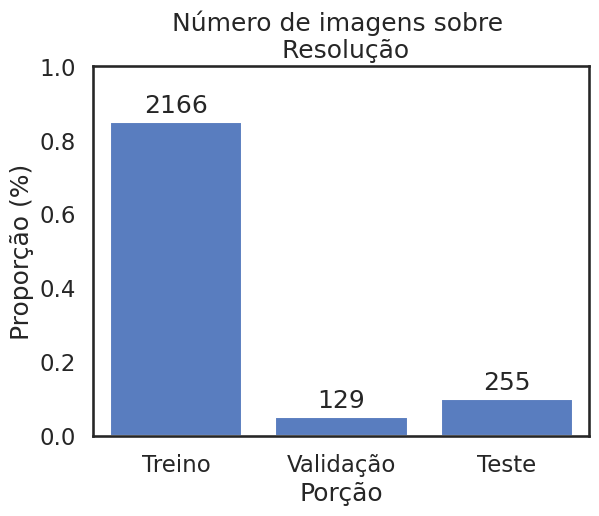

In [16]:
sizes = np.array([NLHR_train, NLHR_val, NLHR_test])
proportions = sizes / np.sum(sizes)

ax = sns.barplot(x=["Treino", "Validação", "Teste"] ,y=proportions)
ax.bar_label(ax.containers[0], labels=sizes, padding=3)
ax.set_ylim(0, 1) 

plt.ylabel("Proporção (%)")
plt.xlabel("Porção")
plt.title("Número de imagens sobre \n Resolução")
plt.show()

### Baixa Luminosidade
As imagens para Low Light Enhancement são divididas em 5 tipos:

(Mais clara) **2.5 -> 3.0 -> 3.5 -> 4.0 -> 4.5** (Mais escura)

<div style="display: flex; justify-content: center; align-items: center; gap: 10px;">

  <figure style="text-align: center">
    <img src="https://i.postimg.cc/qRFsV6RG/ll.png" style="width: 100%;" alt="Descrição da imagem">
    <figcaption>Diferentes iluminações: retiradas diretamente do paper</figcaption>
  </figure>

</div>

In [17]:
LLLR_train = get_number_files(f"./RELLISUR-Dataset/Train/LLLR")
LLLR_val = get_number_files(f"./RELLISUR-Dataset/Val/LLLR")
LLLR_test = get_number_files(f"./RELLISUR-Dataset/Test/LLLR")

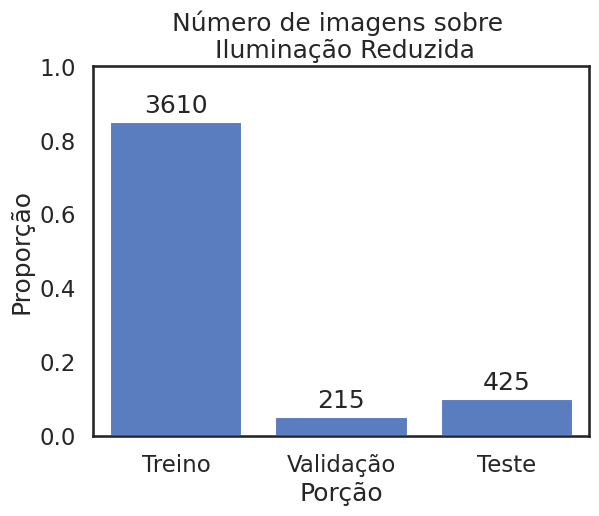

In [18]:
sizes = np.array([LLLR_train, LLLR_val, LLLR_test])
proportions = sizes / np.sum(sizes)

ax = sns.barplot(x=["Treino", "Validação", "Teste"] ,y=proportions)
ax.bar_label(ax.containers[0], labels=sizes, padding=3)
ax.set_ylim(0, 1) 

plt.ylabel("Proporção")
plt.xlabel("Porção")
plt.title("Número de imagens sobre \n Iluminação Reduzida")
plt.show()

### Utilização do Dataset
O **objetivo** do dataset é suprir a falta de modelos de **melhoramento completo**, isto é, melhoramento de resolução e iluminação em um mesmo **treinamento end-to-end**. Para isso, os autores fizeram os **dois tipos de manipulação em todas as imagens**: o ground truth de iluminação pode ser uma imagem 1x, 2x, ou 4x. A **combinação** das duas modalidades gera um total de **12750** pares de imagens.

**Pode ser usado tanto para Super Resolution isolado, Low Light Enhancement isolado, ou os dois de forma combinada.**

**Licensa:** Attribution 4.0 International (CC BY 4.0)
 - Pode fazer basicamente o que bem entender com o dataset, contanto que os créditos sejam dados aos autores e as mundanças feitas sejam indicadas claramente.

### Características dos Dados

**Iluminação**: Todas são de tamanho 625x625 pixels (1x)

- **Problema**: as imagens mais escuras ficaram escuras demais até mesmo para discernir se a fotografia saiu correta e sem agentes inesperados (como um pássaro voando).

**Resolução**:
- **1x** = 625 x 625;
- **2x** = 1250 x 1250;
- **4x** = 2500 x 2500;

**Problema**: as imagens são tiradas em sequências muito rápidas, mas podem capturar alguma diferença pequena (os autores fizeram um esforço para evitar isso). Além disso, o recorte feito para cada uma das imagens pode ser um pouco irregular em relação às outras fotos relacionadas, mesmo utilizando técnicas avançadas (detectar SURF features, e MSAC) para evitar esse problema

**Contexto**: Segundo os autores, a distribuição de imagens em ambiente **externo** e **interno** é de aproximadamente **51%** e **49%** respectivamente. Ótimo para **evitar** um **modelo enviesado**.

**OBS**: O dataset não possui imagem que possam identificar alguém: evitaram pessoas, rostos, placas de carro, e qualquer conteúdo que possa ser considerado ofensivo. Assim, pode ser que o modelo performe pior em imagens que possuam essas características.

## Planejamento Inicial
O dataset possui imagens tanto sobre Super Resolution quanto Low Light Enhancement.

### Pré-Processamento
1. Aplicar rotação e translação de imagens (lembrar de aplicar a mesma trasnformação às imagens ground-truth);
2. Não existe desbalanceamento interno e outros problemas comuns no dataset, principalmente pela natureza do problema;

### Experimentos Iniciais
Ainda preciso **estudar** sobre **melhoramento e geração de imagem**. Por isso, planejo **começar** pelo mais **simples**:
- **Arquitetura**: Redes Neurais Convolucionais comuns, utilizando ADAM;
- **Loss functions**: MSE ou PSNR.
- **Separar o problema**: treinar um modelo somente de Super Resolution, ou somente de Low Light Enhancement;
- Os resultados provavelmente não serão tão bons, mas basta haver algum resultado para validar o método de treinamento;

### Próximos Passos
- **Testar outras arquiteturas de redes**: U-Net, Res-Net, Redes Adversárias;
- **Testar outras losses**: procurar outras métricas por píxel, e também por percepção;
- **Juntar o problema**: treinamento end-to-end;

## Referências
**Paper do dataset**: Andreas Aakerberg, Kamal Nasrollahi, and Thomas B. Moeslund. “RELLISUR: A Real Low-Light Image Super-Resolution Dataset.” Version 1.0.0. Zenodo, August 23, 2021. https://doi.org/10.5281/ZENODO.5234969.

(**M. Rasheed, D. Shi,LSR**: *Lightening super-resolution deep network for low-light image enhancement*): https://www.sciencedirect.com/science/article/abs/pii/S092523122200916X

**Super-resolution Neural Networks (Amit Yadav)**: https://medium.com/@amit25173/super-resolution-neural-networks-3f27b64ad6f8
